In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


data = np.loadtxt('train_1d_reg_data.csv', delimiter=',', skiprows=1, unpack=False)
xarray = data[...,0] # Need to get this on a matrix-form!
Y = data[...,1]
print(data)
print(" ")




[[0.418 0.438]
 [0.722 0.606]
 [0.    0.102]
 [0.303 0.323]
 [0.147 0.13 ]
 [0.092 0.468]
 [0.187 0.263]
 [0.346 0.465]
 [0.398 0.321]
 [0.54  0.613]
 [0.42  0.236]
 [0.687 0.712]
 [0.205 0.324]
 [0.88  0.961]
 [0.027 0.075]
 [0.672 0.606]
 [0.418 0.494]
 [0.56  0.675]
 [0.141 0.242]
 [0.199 0.335]
 [0.803 0.425]
 [0.971 0.673]
 [0.314 0.443]
 [0.694 0.738]
 [0.879 0.684]
 [0.897 0.964]
 [0.085 0.463]
 [0.039 0.226]
 [0.17  0.03 ]
 [0.88  0.512]
 [0.099 0.177]
 [0.422 0.582]
 [0.96  0.799]
 [0.535 0.276]
 [0.694 0.583]
 [0.316 0.579]
 [0.688 0.563]
 [0.837 0.606]
 [0.018 0.458]
 [0.752 0.65 ]
 [0.992 0.726]
 [0.75  0.683]
 [0.281 0.374]
 [0.791 0.616]
 [0.103 0.409]
 [0.449 0.598]
 [0.911 0.832]
 [0.294 0.368]
 [0.288 0.509]
 [0.13  0.28 ]
 [0.019 0.275]
 [0.681 0.722]
 [0.212 0.426]
 [0.266 0.57 ]
 [0.493 0.546]
 [0.053 0.047]
 [0.576 0.408]
 [0.147 0.451]
 [0.591 0.512]
 [0.702 0.659]
 [0.103 0.171]
 [0.415 0.565]
 [0.696 0.567]
 [0.415 0.618]
 [0.05  0.178]
 [0.537 0.649]
 [0.666 0.

In [30]:
print(len(xarray))
print(len(Y))

325
325


In [161]:
# Need X on the form 1,x1. We only have one feature for this task.
X = np.ones((len(xarray), 2))
place = 0
for obs in xarray:
    # Put one obs in each place in X
    X[place,1] = obs
    place+=1
print(X)    

[[1.    0.418]
 [1.    0.722]
 [1.    0.   ]
 [1.    0.303]
 [1.    0.147]
 [1.    0.092]
 [1.    0.187]
 [1.    0.346]
 [1.    0.398]
 [1.    0.54 ]
 [1.    0.42 ]
 [1.    0.687]
 [1.    0.205]
 [1.    0.88 ]
 [1.    0.027]
 [1.    0.672]
 [1.    0.418]
 [1.    0.56 ]
 [1.    0.141]
 [1.    0.199]
 [1.    0.803]
 [1.    0.971]
 [1.    0.314]
 [1.    0.694]
 [1.    0.879]
 [1.    0.897]
 [1.    0.085]
 [1.    0.039]
 [1.    0.17 ]
 [1.    0.88 ]
 [1.    0.099]
 [1.    0.422]
 [1.    0.96 ]
 [1.    0.535]
 [1.    0.694]
 [1.    0.316]
 [1.    0.688]
 [1.    0.837]
 [1.    0.018]
 [1.    0.752]
 [1.    0.992]
 [1.    0.75 ]
 [1.    0.281]
 [1.    0.791]
 [1.    0.103]
 [1.    0.449]
 [1.    0.911]
 [1.    0.294]
 [1.    0.288]
 [1.    0.13 ]
 [1.    0.019]
 [1.    0.681]
 [1.    0.212]
 [1.    0.266]
 [1.    0.493]
 [1.    0.053]
 [1.    0.576]
 [1.    0.147]
 [1.    0.591]
 [1.    0.702]
 [1.    0.103]
 [1.    0.415]
 [1.    0.696]
 [1.    0.415]
 [1.    0.05 ]
 [1.    0.537]
 [1.    0.

In [163]:
# Calculating the weigths for one feature:
Xtrans = np.transpose(X)

XtransDotX = np.dot(Xtrans,X)


# inverse of this result:
matrix1= np.matrix(XtransDotX)



matrix1= matrix1.I
print(' matrix1:')
print(matrix1)

# Xtrans dotted with Y:
XtransDotY = np.dot(Xtrans,Y)

# Finally, to get w:

w = np.dot(matrix1,XtransDotY)
# print(w)







 matrix1:
[[ 0.01207634 -0.0177458 ]
 [-0.0177458   0.03499266]]


AttributeError: module 'matplotlib.pyplot' has no attribute 'plit'

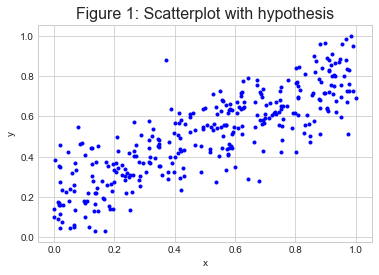

In [198]:
# plotting the actual data:

plt.style.use('seaborn-whitegrid')

def f(x):
 return (w[0,0] + w[0,1]*x)
modelPoints = f(xarray)


plt.xlabel('x')
plt.ylabel('y')
plt.title('Figure 1: Scatterplot with hypothesis', size = 16)
plt.scatter(xarray, Y,label = 'test', marker='.',color='blue')
plt.plit(xarray, modelPoints)
plt.legend(loc='upper left')
ply.show()













In [169]:
# **** Plotting my hypothesis **** : 


# Adding one at the start of the array (because of the bias)
xWithOne = np.insert(xarray,0,1)

# Putting the x-values into a matrix of one column.
xMatrix = np.reshape(xWithOne, (len(xWithOne), 1))
print(xMatrix)

wtrans = np.transpose(w)
print(' ')
print(w)
print(' ')
h = np.dot(wtrans,xMatrix)

#print(np.matrix(xarray))

len(wtrans)


[[1.   ]
 [0.418]
 [0.722]
 [0.   ]
 [0.303]
 [0.147]
 [0.092]
 [0.187]
 [0.346]
 [0.398]
 [0.54 ]
 [0.42 ]
 [0.687]
 [0.205]
 [0.88 ]
 [0.027]
 [0.672]
 [0.418]
 [0.56 ]
 [0.141]
 [0.199]
 [0.803]
 [0.971]
 [0.314]
 [0.694]
 [0.879]
 [0.897]
 [0.085]
 [0.039]
 [0.17 ]
 [0.88 ]
 [0.099]
 [0.422]
 [0.96 ]
 [0.535]
 [0.694]
 [0.316]
 [0.688]
 [0.837]
 [0.018]
 [0.752]
 [0.992]
 [0.75 ]
 [0.281]
 [0.791]
 [0.103]
 [0.449]
 [0.911]
 [0.294]
 [0.288]
 [0.13 ]
 [0.019]
 [0.681]
 [0.212]
 [0.266]
 [0.493]
 [0.053]
 [0.576]
 [0.147]
 [0.591]
 [0.702]
 [0.103]
 [0.415]
 [0.696]
 [0.415]
 [0.05 ]
 [0.537]
 [0.666]
 [0.516]
 [0.947]
 [0.588]
 [0.906]
 [0.138]
 [0.14 ]
 [0.81 ]
 [0.399]
 [0.166]
 [0.93 ]
 [0.349]
 [0.753]
 [0.728]
 [0.886]
 [0.625]
 [0.753]
 [0.35 ]
 [0.271]
 [0.898]
 [0.429]
 [0.967]
 [0.665]
 [0.623]
 [0.115]
 [0.952]
 [0.451]
 [0.58 ]
 [0.409]
 [0.238]
 [0.906]
 [0.575]
 [0.003]
 [0.619]
 [0.327]
 [0.528]
 [0.888]
 [0.358]
 [0.911]
 [0.625]
 [0.016]
 [0.932]
 [0.693]
 [1.   ]
 

ValueError: shapes (2,1) and (326,1) not aligned: 1 (dim 1) != 326 (dim 0)

In [195]:
def f(x):
 return (w[0,0] + w[0,1]*x)
modelPoints = f(xarray)
print(modelPoints)





[0.45177377 0.63809171 0.1955866  0.38129165 0.28568113 0.2519723
 0.31019665 0.40764584 0.43951601 0.5265461  0.45299954 0.61664063
 0.32122863 0.734928   0.21213458 0.60744731 0.45177377 0.53880386
 0.28200381 0.31755131 0.68773563 0.79070081 0.38803342 0.62093084
 0.73431511 0.7453471  0.24768208 0.21948923 0.29977756 0.734928
 0.25626251 0.45422532 0.78395904 0.52348166 0.62093084 0.3892592
 0.61725352 0.70857382 0.20661859 0.65647834 0.80357145 0.65525257
 0.36780812 0.68038097 0.25871406 0.47077329 0.75392753 0.37577566
 0.37209833 0.27526204 0.20723148 0.6129633  0.32551885 0.3586148
 0.49774036 0.22806967 0.54861006 0.28568113 0.55780338 0.62583395
 0.25871406 0.4499351  0.62215662 0.4499351  0.226231   0.52470743
 0.60376998 0.51183679 0.77599149 0.55596472 0.75086309 0.28016514
 0.28139092 0.69202585 0.4401289  0.297326   0.7655724  0.4094845
 0.65709123 0.64176903 0.73860533 0.57864157 0.65709123 0.41009739
 0.36167924 0.74595998 0.45851554 0.78824925 0.60315709 0.5774158
 0